In [1]:
import os

import pandas as pd
import numpy as np
from scipy import io as sio
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
def wrp(x):
    bigger90=x>np.pi/2
    smaller90=x<-np.pi/2
    x[bigger90]=x[bigger90]-np.pi
    x[smaller90]=x[smaller90]+np.pi
    return x
def wrpdeg(x):
    bigger90=x>90
    smaller90=x<-90
    x[bigger90]=x[bigger90]-180
    x[smaller90]=x[smaller90]+180
    return x

In [4]:
df=pd.read_csv('sub208_rt_rs_deidentify.csv')
# final subjects
print(df.shape[0]/120)

208.0


In [25]:
# precision ACROSS subjects
precisiondf_all=df[['id','abserror','deabserror']].groupby('id').mean()
# precisiondf_all

In [24]:
print("1-item trial")
print(np.mean(np.array(precisiondf_all['deabserror']))," ± ",np.std(np.array(precisiondf_all['deabserror'])))
print("3-item trial")
print(np.mean(np.array(precisiondf_all['abserror']))," ± ",np.std(np.array(precisiondf_all['abserror'])))

1-item trial
12.275240384615385  ±  6.287192697024876
3-item trial
20.561298076923077  ±  8.49598108533614


In [26]:
# precision ACROSS subjects
rdf=df[df['debadtrial']!=True]
precisiondf=rdf[['id','abserror','deabserror']].groupby('id').mean()
# precisiondf

In [5]:
print("1-item trial")
print(np.mean(np.array(precisiondf['deabserror']))," ± ",np.std(np.array(precisiondf['deabserror'])))
print("3-item trial")
print(np.mean(np.array(precisiondf['abserror']))," ± ",np.std(np.array(precisiondf['abserror'])))

1-item trial
10.207627751401889  ±  5.586757097212392
3-item trial
20.541134704046506  ±  8.547422458215115


In [27]:
# before drop 
print('before drop')
print('low conflict')
thisdf=df.loc[df['trialconflict']==1]
mean2df=thisdf[['id','abserror','deabserror']].groupby(['id']).mean()
print("1-item trial")
print(np.mean(np.array(mean2df['deabserror']))," ± ",np.std(np.array(mean2df['deabserror'])))
print("3-item trial")
print(np.mean(np.array(mean2df['abserror']))," ± ",np.std(np.array(mean2df['abserror'])))

before drop
low conflict
1-item trial
12.50584935897436  ±  6.6923562904824685
3-item trial
20.029807692307692  ±  9.29413721124663


In [28]:
# before drop 
print('before drop')
print('high conflict')
thisdf=df.loc[df['trialconflict']==2]
mean2df=thisdf[['id','abserror','deabserror']].groupby(['id']).mean()
print("1-item trial")
print(np.mean(np.array(mean2df['deabserror']))," ± ",np.std(np.array(mean2df['deabserror'])))
print("3-item trial")
print(np.mean(np.array(mean2df['abserror']))," ± ",np.std(np.array(mean2df['abserror'])))

before drop
high conflict
1-item trial
12.044631410256413  ±  6.431849069249968
3-item trial
21.09278846153846  ±  8.628147346110383


In [30]:
# after drop 
print('after drop')
print('low conflict')
thisdf=rdf.loc[rdf['trialconflict']==1]
mean2df=thisdf[['id','abserror','deabserror']].groupby(['id']).mean()
print("1-item trial")
print(np.mean(np.array(mean2df['deabserror']))," ± ",np.std(np.array(mean2df['deabserror'])))
print("3-item trial")
print(np.mean(np.array(mean2df['abserror']))," ± ",np.std(np.array(mean2df['abserror'])))

after drop
low conflict
1-item trial
10.384278961733706  ±  5.985264694956016
3-item trial
20.071771027894744  ±  9.320742846610429


In [31]:
# after drop 
print('after drop')
print('high conflict')
thisdf=rdf.loc[rdf['trialconflict']==2]
mean2df=thisdf[['id','abserror','deabserror']].groupby(['id']).mean()
print("1-item trial")
print(np.mean(np.array(mean2df['deabserror']))," ± ",np.std(np.array(mean2df['deabserror'])))
print("3-item trial")
print(np.mean(np.array(mean2df['abserror']))," ± ",np.std(np.array(mean2df['abserror'])))

after drop
high conflict
1-item trial
10.049781980978748  ±  5.474359123252426
3-item trial
21.019148583043304  ±  8.669505586156559


In [5]:

deallmask=df['debadtrial']==True
deallfmask=df['debadtrial']!=True
df.loc[deallmask, 'deerror'] = np.nan
meanbias=np.nanmean(np.array(df['deerror']))
print(meanbias)
# print(df.loc[deallfmask, 'deerror'][0:20])
df.loc[deallfmask, 'deerror']=wrpdeg(df.loc[deallfmask, 'deerror']-meanbias)
# print(df.loc[deallfmask, 'deerror'][0:20])
hdf=df[df['trialconflict']==2]
ldf=df[df['trialconflict']==1]
hdftc=hdf[hdf['testc']==1]
ldftc=ldf[ldf['testc']==1]

-0.8527801179443977


In [6]:
hpmidirec=np.array(hdf['pmiori'])
himidirec=np.array(hdf['imiori'])
hntdirec=np.array(hdf['nontarget'])
htdirec=np.array(hdf['target'])
lpmidirec=np.array(ldf['pmiori'])
limidirec=np.array(ldf['imiori'])
lntdirec=np.array(ldf['nontarget'])
ltdirec=np.array(ldf['target'])

htcpmidirec=np.array(hdftc['pmiori'])
ltcpmidirec=np.array(ldftc['pmiori'])

d_h_pmi = hpmidirec - np.array(hdf['deori'])
d_h_imi = himidirec - np.array(hdf['deori'])
d_h_nt = hntdirec - np.array(hdf['deori'])
d_h_t = htdirec - np.array(hdf['deori'])
d_l_pmi = lpmidirec - np.array(ldf['deori'])
d_l_imi = limidirec - np.array(ldf['deori'])
d_l_nt = lntdirec - np.array(ldf['deori'])
d_l_t = ltdirec - np.array(ldf['deori'])

d_htc_pmi = htcpmidirec - np.array(hdftc['deori'])
d_ltc_pmi = ltcpmidirec - np.array(ldftc['deori'])

hdf['d_h_pmi']=d_h_pmi
hdf['d_h_imi']=d_h_imi
hdf['d_h_nt']=d_h_nt
hdf['d_h_t']=d_h_t
ldf['d_l_pmi']=d_l_pmi
ldf['d_l_imi']=d_l_imi
ldf['d_l_nt']=d_l_nt
ldf['d_l_t']=d_l_t

hdftc['d_htc_pmi']=d_htc_pmi
ldftc['d_ltc_pmi']=d_ltc_pmi
hdftc.loc[hdftc['d_htc_pmi']>90,'d_htc_pmi']=hdftc.loc[hdftc['d_htc_pmi']>90,'d_htc_pmi']-180
hdftc.loc[hdftc['d_htc_pmi']<-90,'d_htc_pmi']=hdftc.loc[hdftc['d_htc_pmi']<-90,'d_htc_pmi']+180
ldftc.loc[ldftc['d_ltc_pmi']>90,'d_ltc_pmi']=ldftc.loc[ldftc['d_ltc_pmi']>90,'d_ltc_pmi']-180
ldftc.loc[ldftc['d_ltc_pmi']<-90,'d_ltc_pmi']=ldftc.loc[ldftc['d_ltc_pmi']<-90,'d_ltc_pmi']+180

for thiscol in ['d_h_pmi','d_h_imi','d_h_nt','d_h_t']:
    hdf.loc[hdf[thiscol]>90,thiscol]=hdf.loc[hdf[thiscol]>90,thiscol]-180
    hdf.loc[hdf[thiscol]<-90,thiscol]=hdf.loc[hdf[thiscol]<-90,thiscol]+180
for thiscol in ['d_l_pmi','d_l_imi','d_l_nt','d_l_t']:
    ldf.loc[ldf[thiscol]>90,thiscol]=ldf.loc[ldf[thiscol]>90,thiscol]-180
    ldf.loc[ldf[thiscol]<-90,thiscol]=ldf.loc[ldf[thiscol]<-90,thiscol]+180

#### Remove bad trial

# h_bad_mask=hdf['badtrial']==True
# hdf.loc[h_bad_mask, 'deerror'] = np.nan
# l_bad_mask=ldf['badtrial']==True
# ldf.loc[l_bad_mask, 'deerror'] = np.nan

h_badde_mask=hdf['debadtrial']==True
hdf.loc[h_badde_mask, 'deerror'] = np.nan
l_badde_mask=ldf['debadtrial']==True
ldf.loc[l_badde_mask, 'deerror'] = np.nan
# ldf[['pmiori','imiori','deori','d_l_pmi','d_l_imi','d_l_nt','deerror']]

# htc_bad_mask=hdftc['badtrial']==True
# hdftc.loc[htc_bad_mask, 'deerror'] = np.nan
# ltc_bad_mask=ldftc['badtrial']==True
# ldftc.loc[ltc_bad_mask, 'deerror'] = np.nan
htc_badde_mask=hdftc['debadtrial']==True
hdftc.loc[htc_badde_mask, 'deerror'] = np.nan
ltc_badde_mask=ldftc['debadtrial']==True
ldftc.loc[ltc_badde_mask, 'deerror'] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [7]:
d_h_pmi = np.array(hdf['d_h_pmi'])
d_h_imi = np.array(hdf['d_h_imi'])
d_h_nt = np.array(hdf['d_h_nt'])
d_h_t = np.array(hdf['d_h_t'])
d_l_pmi = np.array(ldf['d_l_pmi'])
d_l_imi = np.array(ldf['d_l_imi'])
d_l_nt = np.array(ldf['d_l_nt'])
d_l_t = np.array(ldf['d_l_t'])

h_deerror = np.array(hdf['deerror'])
h_ind = ~np.isnan(h_deerror)
d_h_pmi = np.deg2rad(d_h_pmi[h_ind])
d_h_imi = np.deg2rad(d_h_imi[h_ind])
d_h_nt = np.deg2rad(d_h_nt[h_ind])
d_h_t = np.deg2rad(d_h_t[h_ind])

l_deerror = np.array(ldf['deerror'])
l_ind = ~np.isnan(l_deerror)
d_l_pmi = np.deg2rad(d_l_pmi[l_ind])
d_l_imi = np.deg2rad(d_l_imi[l_ind])
d_l_nt = np.deg2rad(d_l_nt[l_ind])
d_l_t = np.deg2rad(d_l_t[l_ind])

h_deerror_rad = np.deg2rad(h_deerror[h_ind])
l_deerror_rad = np.deg2rad(l_deerror[l_ind])

###
d_htc_pmi = np.array(hdftc['d_htc_pmi'])
d_ltc_pmi = np.array(ldftc['d_ltc_pmi'])
h_deerror = np.array(hdf['deerror'])

htc_deerror = np.array(hdftc['deerror'])
htc_ind = ~np.isnan(htc_deerror)
d_htc_pmi = np.deg2rad(d_htc_pmi[htc_ind])
ltc_deerror = np.array(ldftc['deerror'])
ltc_ind = ~np.isnan(ltc_deerror)
d_ltc_pmi = np.deg2rad(d_ltc_pmi[ltc_ind])

htc_deerror_rad = np.deg2rad(htc_deerror[htc_ind])
ltc_deerror_rad = np.deg2rad(ltc_deerror[ltc_ind])

In [8]:
def dog(x, a, w):
    c = np.sqrt(2) / np.exp(-0.5)
    return x * a * w * c * np.exp(-(w * x) ** 2)


def fit_dog(y, x):

    def _solver(params):
        a, w = params
        return y - dog(x, a, w)

    min_a = -np.pi/2
    max_a = np.pi/2

    min_w = 0.8
    max_w = 8.0

    min_cost = np.inf
    for _ in range(200):
        params_0 = [np.random.rand() * (max_a - min_a) + min_a,
                    np.random.rand() * (max_w - min_w) + min_w]
        try:
            result = least_squares(_solver, params_0,
                                   bounds=([min_a, min_w],
                                           [max_a, max_w]))
        except ValueError:
            continue
        if result['cost'] < min_cost:
            best_params, min_cost = result['x'], result['cost']
    try:
        return best_params[0], best_params[1], min_cost
    except UnboundLocalError:
        return np.nan, np.nan, min_cost

In [9]:
h_pmi_a, h_pmi_w, _ = fit_dog(h_deerror_rad, d_h_pmi)
h_imi_a, h_imi_w, _ = fit_dog(h_deerror_rad, d_h_imi)
h_nt_a, h_nt_w, _ = fit_dog(h_deerror_rad, d_h_nt)
h_t_a, h_t_w, _ = fit_dog(h_deerror_rad, d_h_t)
l_pmi_a, l_pmi_w, _ = fit_dog(l_deerror_rad, d_l_pmi)
l_imi_a, l_imi_w, _ = fit_dog(l_deerror_rad, d_l_imi)
l_nt_a, l_nt_w, _ = fit_dog(l_deerror_rad, d_l_nt)
l_t_a, l_t_w, _ = fit_dog(l_deerror_rad, d_l_t)

htc_pmi_a, htc_pmi_w, _ = fit_dog(htc_deerror_rad, d_htc_pmi)
ltc_pmi_a, ltc_pmi_w, _ = fit_dog(ltc_deerror_rad, d_ltc_pmi)

In [10]:
print(h_imi_a, h_imi_w)
print(l_imi_a, l_imi_w)

0.008958295647856086 3.7150462544510967
-0.004364527838878827 7.999999999999994


In [16]:
# test difference bt low and high imi
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fitl = dog(theta, l_imi_a, l_imi_w) # x,a,w
p2p_l = np.sign(l_imi_a) * (fitl.max() - fitl.min())
fith = dog(theta, h_imi_a, h_imi_w) # x,a,w
p2p_h = np.sign(h_imi_a) * (fith.max() - fith.min())
true_dif=p2p_l-p2p_h

In [17]:
l_deerror_rad_C= np.copy(l_deerror_rad)
h_deerror_rad_C= np.copy(h_deerror_rad)
d_l_imi_C=np.copy(d_l_imi)
d_h_imi_C=np.copy(d_h_imi)

both_d_imi=np.hstack((d_l_imi_C,d_h_imi_C))
both_derror_rad=np.hstack((l_deerror_rad_C,h_deerror_rad_C))

In [18]:
datapoints=both_d_imi.shape[0]//2
n_permutations=1000
dif_p2p = np.empty(n_permutations)
l_para_relabel = np.empty((n_permutations, 3))
h_para_relabel = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        llabel=np.random.choice(both_d_imi.shape[0], size=datapoints, replace=False).tolist()
        hlabel=[fruit for fruit in range(both_d_imi.shape[0]) if fruit not in llabel]
        l_imi_relabel=both_d_imi[llabel]
        h_imi_relabel=both_d_imi[hlabel]
        l_err_relabel=both_derror_rad[llabel]
        h_err_relabel=both_derror_rad[hlabel]
        l_para_relabel[i_perm, :] = fit_dog(l_err_relabel, l_imi_relabel)
        h_para_relabel[i_perm, :] = fit_dog(h_err_relabel, h_imi_relabel)
        theta = np.linspace(-np.pi/2, np.pi/2, 1000)
        fitl = dog(theta, l_para_relabel[i_perm, 0], l_para_relabel[i_perm, 1]) # x,a,w
        p2p_l = np.sign(l_para_relabel[i_perm, 0]) * (fitl.max() - fitl.min())
        fith = dog(theta, h_para_relabel[i_perm, 0], h_para_relabel[i_perm, 1]) # x,a,w
        p2p_h = np.sign(h_para_relabel[i_perm, 0]) * (fith.max() - fith.min())
        relabel_dif=p2p_l-p2p_h
        
        dif_p2p[i_perm]=relabel_dif
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))


c_p = np.count_nonzero(np.abs(dif_p2p) >abs(true_dif)) / float(n_permutations)
print('p-value:', c_p, 'low - hign p2p:', np.rad2deg(true_dif))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
p-value: 0.302 low - hign p2p: -1.5265850966886705


2.143901843697333


Text(0.5, 1.0, 'Bias of the retrocued item (no-overlap condition)')

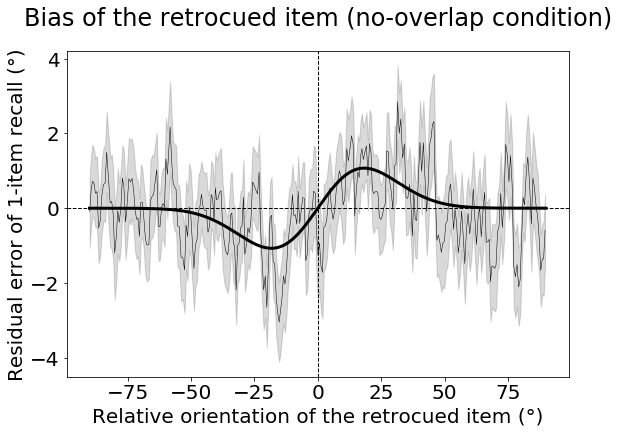

In [13]:
# low conflict influence of PMI
d_stim = np.array(ldf['d_l_pmi'])
error = np.array(ldf['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)  

# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=0.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, l_pmi_a, l_pmi_w))
p2p = np.sign(l_pmi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the retrocued item (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of the retrocued item (no-overlap condition)', pad=25)

# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, l_pmi_a, l_pmi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [20]:
# low conflict influence of PMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_l_pmi)
        params[i_perm, :] = fit_dog(l_deerror_rad, d_l_pmi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, l_pmi_a, l_pmi_w) # x,a,w
p2p_actual = np.sign(l_pmi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(l_pmi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: 1.0 p-value: 0.034 p2p: 2.1439074662909694


In [39]:
# low conflict influence of PMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=l_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=l_deerror_rad[iboot_ind] ###
    iboot_d=d_l_pmi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
l_pmi_params=params####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ 1.170187473753822 ,  3.416167032711818 ]


1.14861422466001


Text(0.5, 1.0, 'Bias of the retrocued item (overlap condition)')

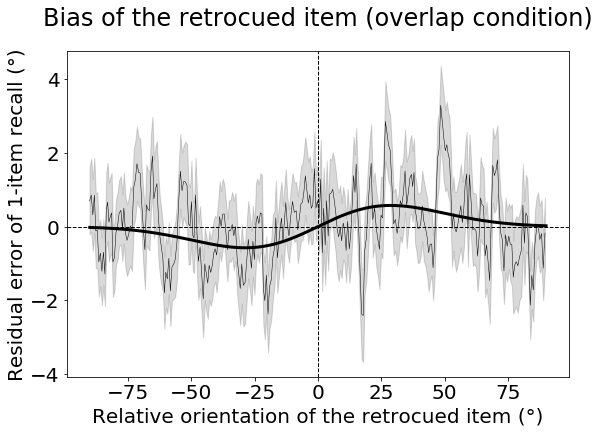

In [17]:
# high conflict influence of PMI
d_stim = np.array(hdf['d_h_pmi'])
error = np.array(hdf['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)      
# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=0.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, h_pmi_a, h_pmi_w))
p2p = np.sign(h_pmi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the retrocued item (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of the retrocued item (overlap condition)', pad=25)

# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, h_pmi_a, h_pmi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [22]:
# high conflict influence of PMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_h_pmi)
        params[i_perm, :] = fit_dog(h_deerror_rad, d_h_pmi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, h_pmi_a, h_pmi_w) # x,a,w
p2p_actual = np.sign(h_pmi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(h_pmi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: 1.0 p-value: 0.262 p2p: 1.148544524388957


In [41]:
# high conflict influence of PMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=h_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=h_deerror_rad[iboot_ind] ###
    iboot_d=d_h_pmi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
h_pmi_params=params ####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ -1.899485050502756 ,  2.054165559652547 ]


-0.5000406055544437


Text(0.5, 1.0, 'Bias of IMI (no-overlap condition)')

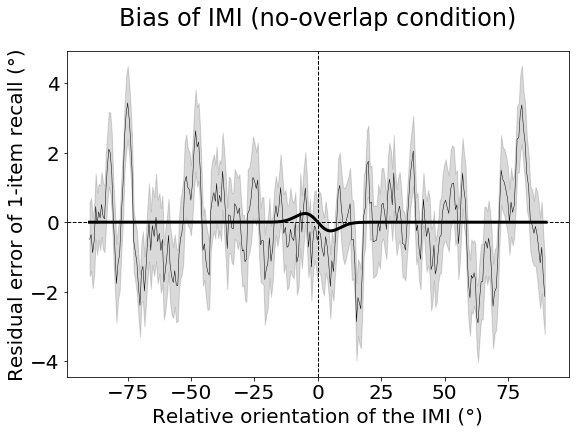

In [18]:
# low conflict influence of IMI
d_stim = np.array(ldf['d_l_imi'])
error = np.array(ldf['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)   

# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=0.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, l_imi_a, l_imi_w))
p2p = np.sign(l_imi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the IMI (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of IMI (no-overlap condition)', pad=25)

# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, l_imi_a, l_imi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [24]:
# low conflict influence of IMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_l_imi)
        params[i_perm, :] = fit_dog(l_deerror_rad, d_l_imi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, l_imi_a, l_imi_w) # x,a,w
p2p_actual = np.sign(l_imi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(l_imi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: -1.0 p-value: 0.766 p2p: -0.5000404905518134


In [43]:
# low conflict influence of IMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=l_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=l_deerror_rad[iboot_ind] ###
    iboot_d=d_l_imi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
l_imi_params=params ####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ -2.359524527007543 ,  1.6373137620571567 ]


1.0265448862135744


Text(0.5, 1.0, 'Bias of IMI (overlap condition)')

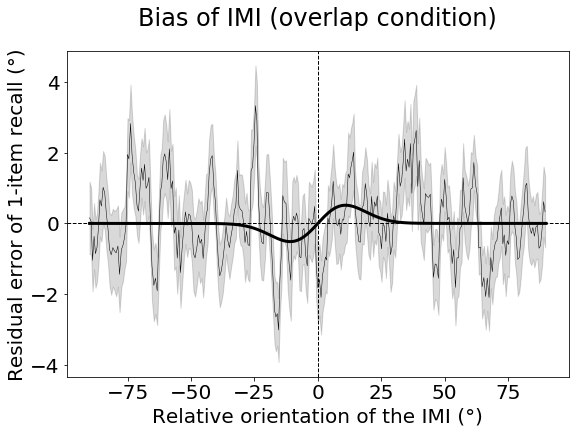

In [19]:
# high conflict influence of IMI
d_stim = np.array(hdf['d_h_imi'])
error = np.array(hdf['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)   
    
# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=0.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, h_imi_a, h_imi_w))
p2p = np.sign(h_imi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the IMI (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of IMI (overlap condition)', pad=25)

# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, h_imi_a, h_imi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [26]:
# high conflict influence of IMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_h_imi)
        params[i_perm, :] = fit_dog(h_deerror_rad, d_h_imi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, h_imi_a, h_imi_w) # x,a,w
p2p_actual = np.sign(h_imi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(h_imi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should NOT be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: 1.0 p-value: 0.301 p2p: 1.0265559970225815


In [45]:
# high conflict influence of IMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=h_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=h_deerror_rad[iboot_ind] ###
    iboot_d=d_h_imi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
h_imi_params=params ####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ -1.630735384417942 ,  2.59264328625928 ]
